In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [57]:
MSFT = pd.read_csv("/Users/lauragutierrez/Documents/PROYECTO ASE/MSFT.CSV", sep=',')

In [58]:
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-15,29.180000,29.370001,29.010000,29.290001,22.866486,37512000
1,2010-03-16,29.420000,29.490000,29.200001,29.370001,22.928942,36723500
2,2010-03-17,29.500000,29.870001,29.400000,29.629999,23.131914,50385700
3,2010-03-18,29.629999,29.719999,29.500000,29.610001,23.116302,43845200
4,2010-03-19,29.760000,29.900000,29.350000,29.590000,23.100687,81332100


In [59]:
filtro = ["Date","Close"]
MSFT = MSFT[filtro]
MSFT.columns = ['Fecha', 'Precio']
MSFT.head()

,Fecha,Precio
0,2010-03-15,29.290001
1,2010-03-16,29.370001
2,2010-03-17,29.629999
3,2010-03-18,29.610001
4,2010-03-19,29.590000


In [60]:
fecha = (MSFT["Fecha"]>="2010-03-15")& (MSFT["Fecha"]<"2020-03-15")
pre = MSFT[fecha]
filtro = ["Precio"]
pre = pre[filtro]

Para la solución del monte carlo se necesita calcular los retornos diarios, precio de x+1-precio x

In [61]:
returns = pre.pct_change()

Imprimo la cola del data frame para ver cual fue el último precio y de ahi empieza a simular los precios posibles.

In [62]:
pre.tail()

,Precio
2513,150.619995
2514,160.919998
2515,153.630005
2516,139.059998
2517,158.830002


In [63]:
returns.head()

,Precio
0,NaN
1,0.002731
2,0.008853
3,-0.000675
4,-0.000675


In [64]:
ultimo = 158.830002

Se hacen 1000 simulaciones, mientras más mejor por 252 días, es decir, un año en la bolsa

In [65]:
simulaciones = 1000

In [66]:
dias = 252

Para las simulaciones necesita tomar en cuenta la volatilidad de los datos previos para predecir como se va a comportar. Se crea un dataframe para ahi guardar la información de cada simulación 

In [67]:
simulacion_df = pd.DataFrame()
for x in range(simulaciones):
    cuenta = 0
    volatilidad = returns.std()
    precios = []
    precio = ultimo*(1+np.random.normal(0,volatilidad))
    precios.append(precio)
    
    for y in range(dias):
        if cuenta == 251:
            break
        precio = precios[cuenta]*(1+np.random.normal(0,volatilidad))
        precios.append(precio)
        cuenta +=1
    
    simulacion_df[x] = precios

Se grafica el dataframe obtenido

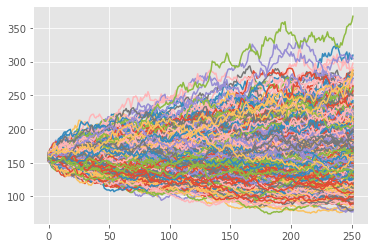

In [68]:
fig = plt.figure()
plt.plot(simulacion_df)
plt.show()

Se repite el mismo proceso pero con datos del 2010 al 2021

In [69]:
filtro = ["Precio"]
MSFT = MSFT[filtro]
returns2 = MSFT.pct_change()

In [70]:
MSFT.tail()

,Precio
2764,227.389999
2765,233.779999
2766,232.419998
2767,237.130005
2768,235.750000


In [71]:
ultimo = 235.7500000

In [74]:
simulacion2_df = pd.DataFrame()
for x in range(simulaciones):
    cuenta = 0
    volatilidad = returns2.std()
    precios = []
    precio = ultimo*(1+np.random.normal(0,volatilidad))
    precios.append(precio)
    
    for y in range(dias):
        if cuenta == 251:
            break
        precio = precios[cuenta]*(1+np.random.normal(0,volatilidad))
        precios.append(precio)
        cuenta +=1
    
    simulacion2_df[x] = precios

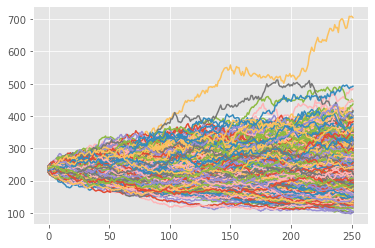

In [75]:
fig = plt.figure()
plt.plot(simulacion2_df)
plt.show()

Se repite el proceso con otra empresa

In [76]:
AMZN = pd.read_csv("/Users/lauragutierrez/Documents/PROYECTO ASE/AMZN.CSV", sep=',')

In [77]:
filtro = ["Date","Close"]
AMZN = AMZN[filtro]
AMZN.columns = ['Fecha', 'Precio']
AMZN.head()

,Fecha,Precio
0,2010-03-15,131.130005
1,2010-03-16,131.789993
2,2010-03-17,131.339996
3,2010-03-18,132.759995
4,2010-03-19,130.350006


In [78]:
fecha = (AMZN["Fecha"]>="2010-03-15")& (AMZN["Fecha"]<"2020-03-15")
preA = AMZN[fecha]
filtro = ["Precio"]
preA = preA[filtro]

In [79]:
returns = preA.pct_change()

In [80]:
preA.tail()

,Precio
2513,1800.609985
2514,1891.819946
2515,1820.859985
2516,1676.609985
2517,1785.000000


In [81]:
ultimo = 1785

In [89]:
simulacion_df = pd.DataFrame()
for x in range(simulaciones):
    cuenta = 0
    volatilidad = returns.std()
    precios = []
    precio = ultimo*(1+np.random.normal(0,volatilidad))
    precios.append(precio)
    
    for y in range(dias):
        if cuenta == 251:
            break
        precio = precios[cuenta]*(1+np.random.normal(0,volatilidad))
        precios.append(precio)
        cuenta +=1
    
    simulacion_df[x] = precios

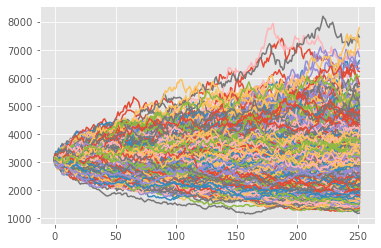

In [90]:
fig = plt.figure()
plt.plot(simulacion_df)
plt.show()

In [91]:
filtro = ["Precio"]
AMZN = AMZN[filtro]
returns2 = AMZN.pct_change()

In [92]:
AMZN.tail()

,Precio
2764,2951.949951
2765,3062.850098
2766,3057.639893
2767,3113.590088
2768,3089.489990


In [93]:
ultimo = 3089.48999

In [96]:
simulacion2_df = pd.DataFrame()
for x in range(simulaciones):
    cuenta = 0
    volatilidad = returns2.std()
    precios = []
    precio = ultimo*(1+np.random.normal(0,volatilidad))
    precios.append(precio)
    
    for y in range(dias):
        if cuenta == 251:
            break
        precio = precios[cuenta]*(1+np.random.normal(0,volatilidad))
        precios.append(precio)
        cuenta +=1
    
    simulacion2_df[x] = precios

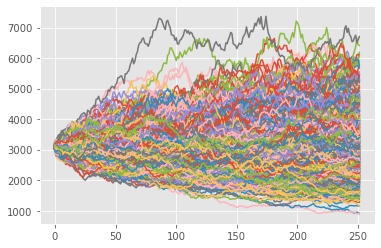

In [97]:
fig = plt.figure()
plt.plot(simulacion2_df)
plt.show()

Se puede probar con otras empresas  